In [1]:
#ADAPTIVE SKELETON WITH 3 COLORS SEEMS TO WORK BEST

import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild021.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)

In [2]:
from PIL import Image
im=Image.open('cropped_Wild021.tif')
width, height=im.size

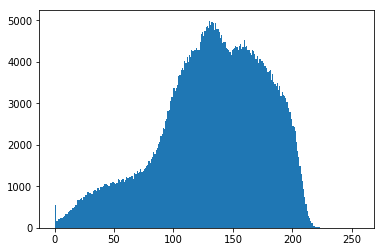

NameError: name 'hist' is not defined

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild021.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

mean=np.mean(img)

print(hist)

In [4]:
import scipy.stats
gausshist= scipy.stats.gaussian_kde(img)


In [5]:
for x in range(256):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: module 'matplotlib.mlab' has no attribute 'normedpdf'

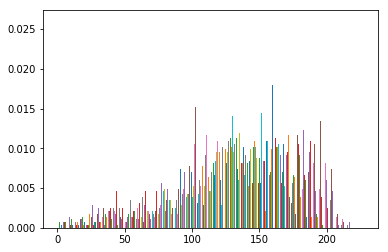

In [7]:
from scipy.stats import norm
import matplotlib.mlab as mlab
(mu,sigma)=norm.fit(img)
plt.figure(1)
n,bins,patches=plt.hist(img,55,normed=1)
y=mlab.normedpdf(bins,mu,sigma)
plt.plot(bins,y,'r--')

In [92]:
import scipy.optimize
scipy.optimize.curve_fit('Gaussian', 255, img)

TypeError: 'Gaussian' is not a callable object

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


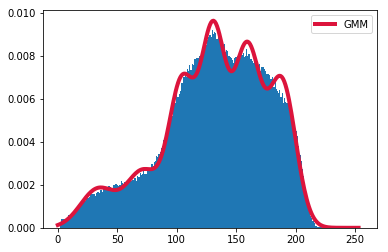

In [93]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist[0] = 0     # Removes background pixels

data = img.ravel()
data = data[data != 0]
data = data[data != 1]  #Removes background pixels (intensities 0 and 1)

# Fit GMM
gmm = GaussianMixture(n_components = 6)
gmm = gmm.fit(X=np.expand_dims(data,1))

# Evaluate GMM
gmm_x = np.linspace(0,253,256)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))


# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(img.ravel(),255,[2,256], normed=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

plt.legend()

plt.show()

TypeError: 'numpy.float64' object is not callable

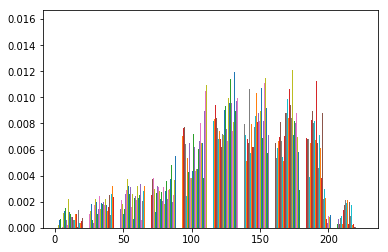

In [94]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt


# plot normed histogram
plt.hist(img, density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(img))

# lets try the normal distribution first
m, s = stats.norm.fit(img) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(img)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(img)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show()  

In [ ]:
image=im.quantize(3,0)
image.save('simple_Wild021.tif')
print(image)
newimg = cv2.imread('simple_Wild021.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()
print(newimg)
newnewimg=newimg[:,:,0]

In [ ]:
maximum= np.amax(newimg)
minimum=np.amin(newimg)

newimg[np.where(newimg == [maximum])] = [255]
newimg[np.where(newimg == [minimum])] = [0]
plt.imshow(newimg, cmap='gray')
newnewimg=newimg[:,:,0]

In [ ]:
ablur = cv2.blur(newnewimg,(23, 23))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,51,4) 

In [ ]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

In [ ]:
from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=50, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, interpolation='sinc') 

In [ ]:
import matplotlib.image as mpimg
img2=mpimg.imread('cropped_Wild021.tif')
imgplot2 = plt.imshow(img2, alpha= .9)

ax2 = plt.subplot()
ax2.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()